# <center> Estimation of Obesity Levels Based on Eating Habits and Physical Condition

## Atribute Information

### The attributes related with eating habits are: 
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables(FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)
### The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)
### other variables obtained were: 
- Gender
- Age
- Height
- Weight
- Family history with overweight
- SMOKE
- NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity   Type I, Obesity Type II and Obesity Type III

# Importing Data 

In [103]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')  # for clean notebook

In [104]:
# Getting data using read_csv
dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [105]:
# Displaying first five rows
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [106]:
# Making copy of dataset
df = dataset.copy(deep = True)

# Exploratory Data Analysis (EDA)

In [107]:
df.shape

(2111, 17)

In [108]:
df.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## Atribute Information

### The attributes related with eating habits are:                    Columns
- Frequent consumption of high caloric food                           (FAVC)
- Frequency of consumption of vegetables                              (FCVC)
- Number of main meals                                                (NCP)
- Consumption of food between meals                                   (CAEC)
- Consumption of water daily                                          (CH20)
- Consumption of alcohol                                              (CALC)
### The attributes related with the physical condition are: 
- Calories consumption monitoring                                     (SCC)
- Physical activity frequency                                         (FAF)
- Time using technology devices                                       (TUE)
- Transportation used                                                 (MTRANS)
### other variables obtained were: 
- Gender
- Age
- Height
- Weight
- Family history with overweight
- SMOKE
- NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity   Type I, Obesity Type II and Obesity Type III

In [109]:
# Statistical insights of numerical columns
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


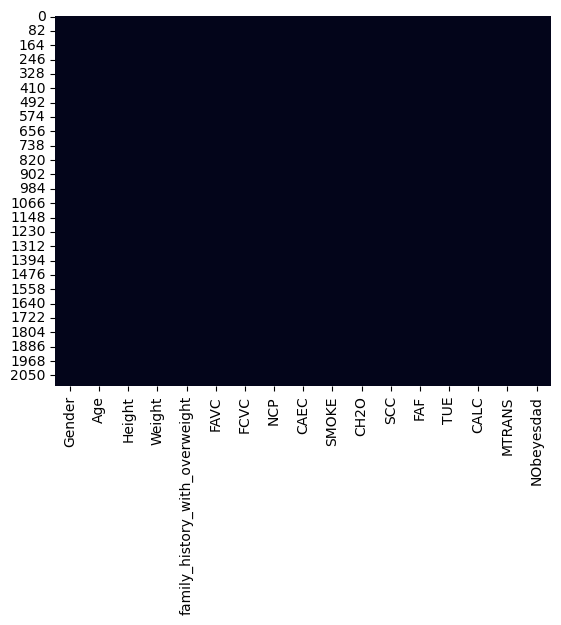

In [110]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

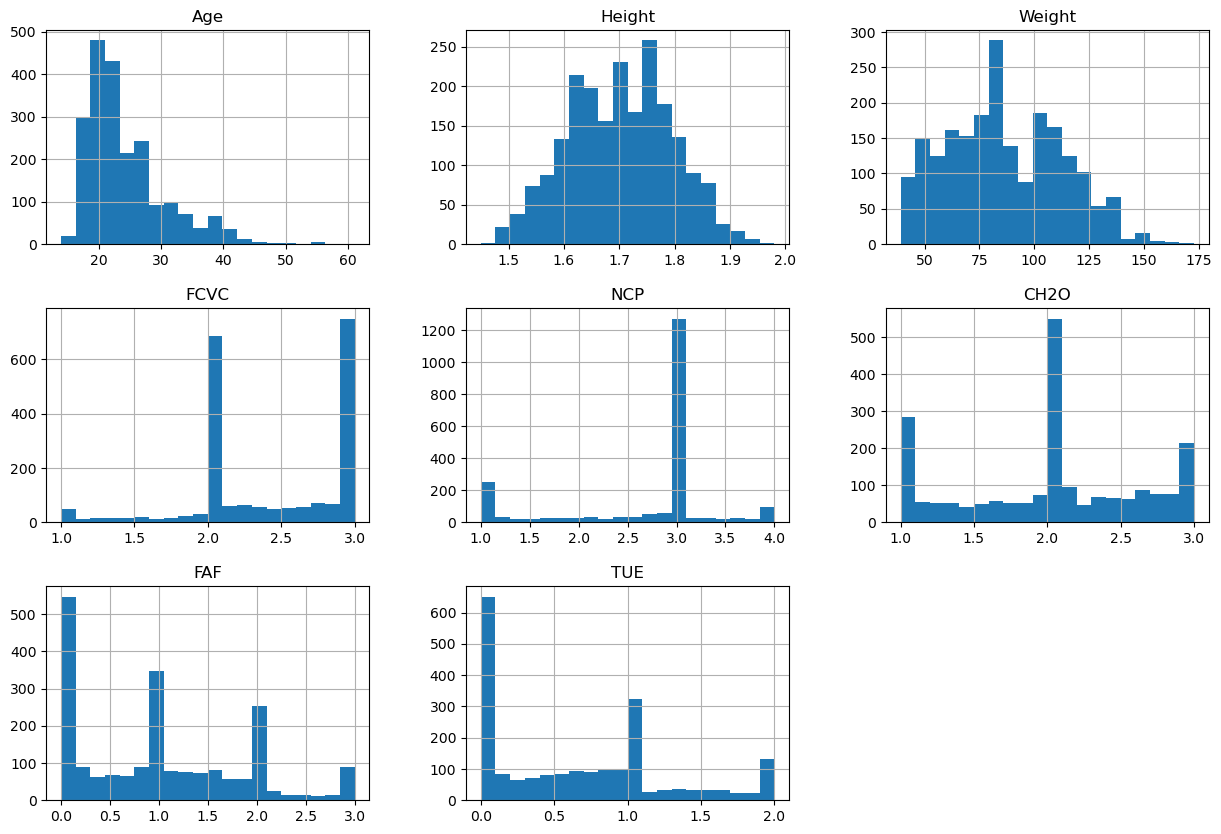

In [111]:
# Plotting histogram
df.hist(figsize=(15,10), bins=20)
plt.show()

### The above diagrams represent frequency of each continuous value.
- we have maximum number of people between age range of 20-30.
- Physical activity frequency is varying with very less people working out daily.
- more than 1200 people prefer three main meals.
- Frequency of consumpion of vegetables is high.

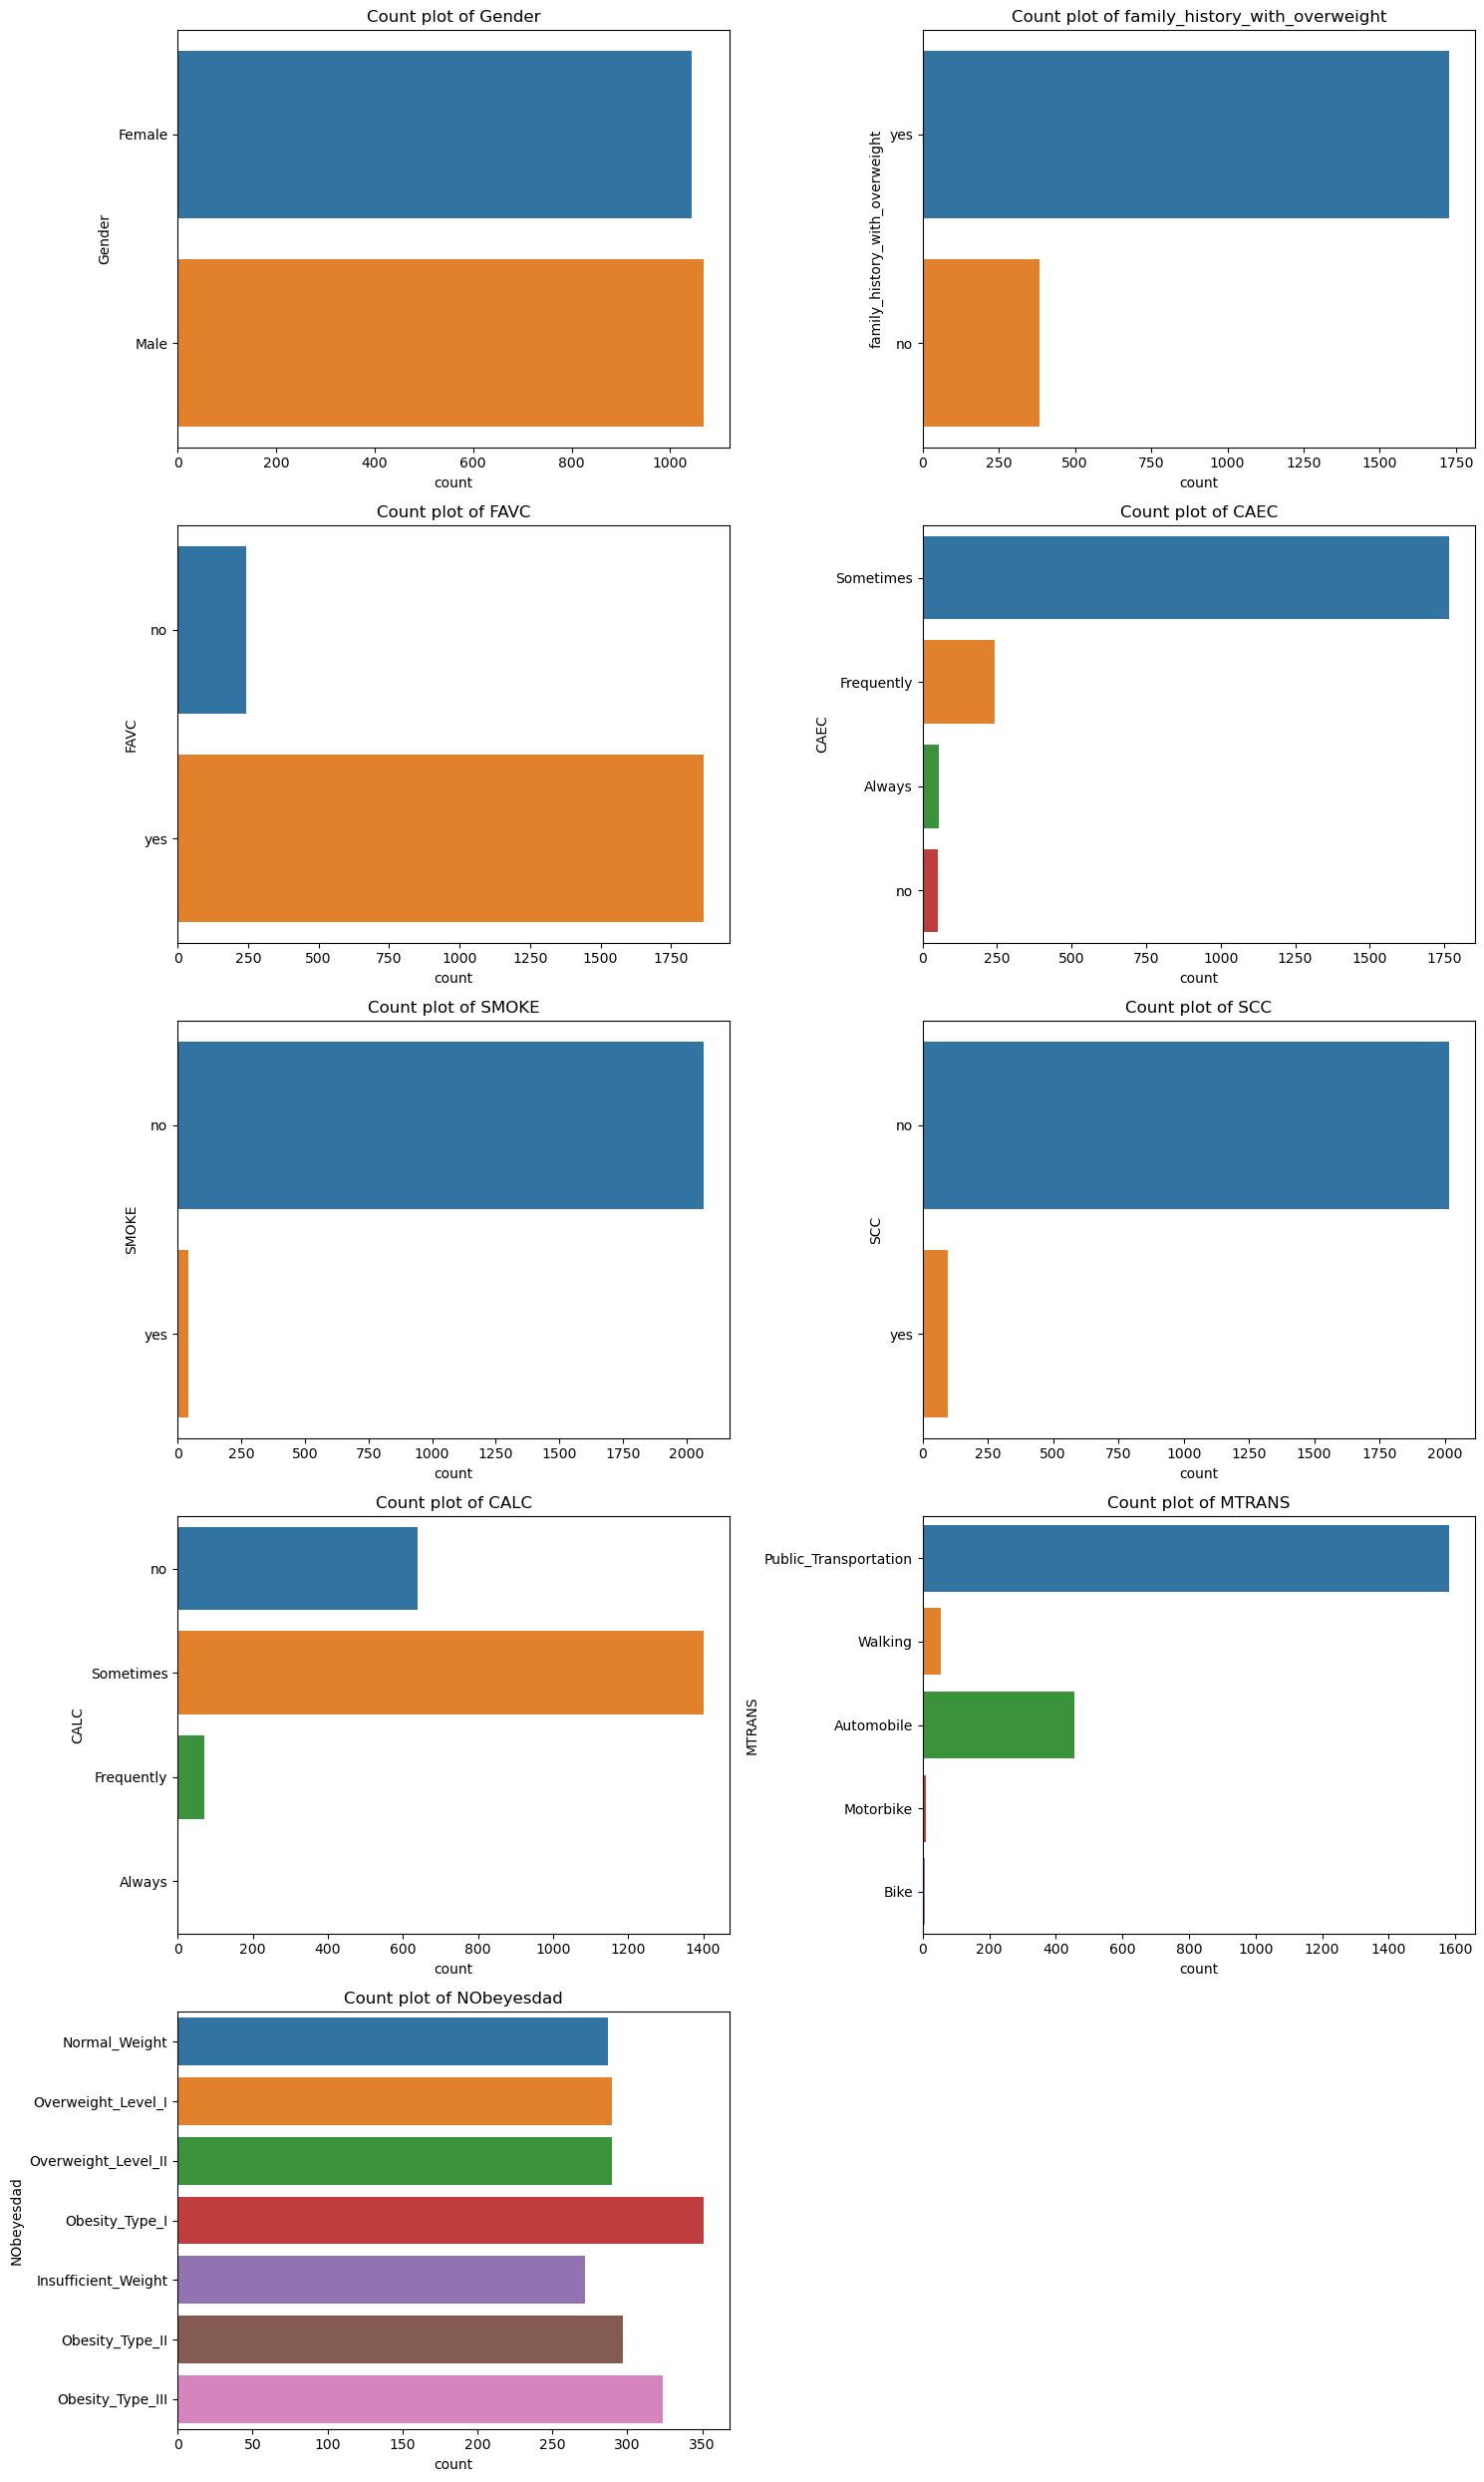

In [112]:
# import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Calculating the number of rows and columns for subplot grid
num_cols = 2  # You can adjust the number of columns as needed
num_rows = -(-len(categorical_columns) // num_cols)  # Ceiling division

# Plotting count plots for each categorical variable
plt.figure(figsize=(15, num_rows * 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, y=column)
    plt.title(f'Count plot of {column}')

plt.tight_layout()
plt.show()

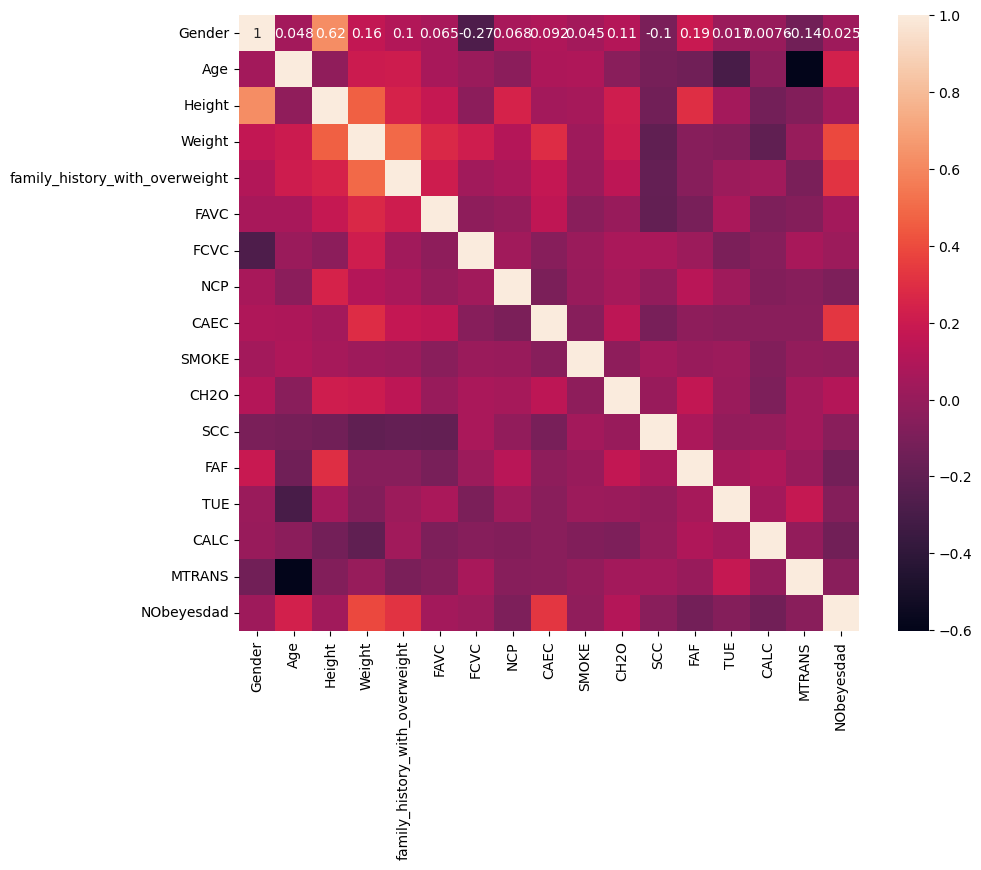

In [113]:
# Encode categorical columns
df_encoded = df.copy()
df_encoded = df_encoded.apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' else x)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()


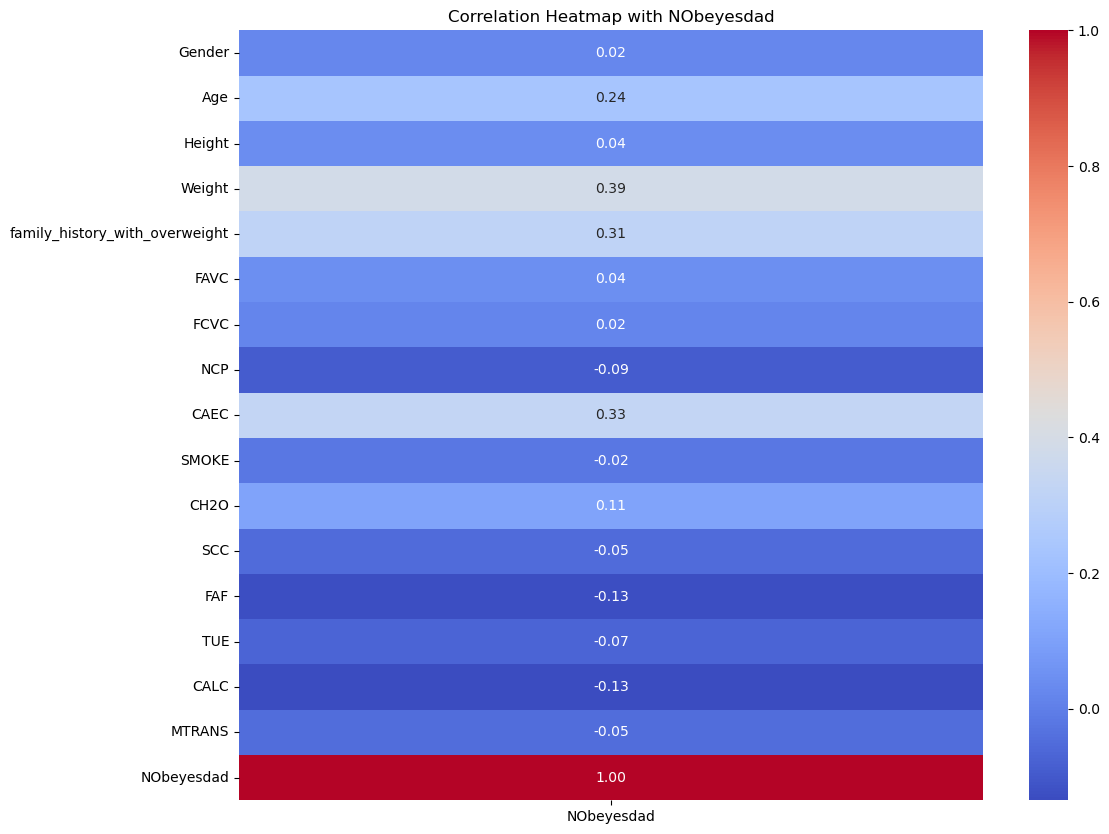

In [114]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':  # Check if the column is categorical
        label_encoder = LabelEncoder()
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['NObeyesdad']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with NObeyesdad')
plt.show()


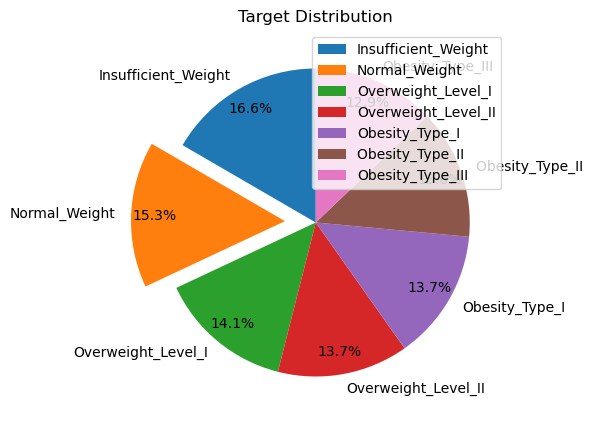

In [115]:

plt.figure(figsize=(5, 5))
myexplode = [ 0, 0.2, 0, 0, 0, 0, 0]
plt.pie(df['NObeyesdad'].value_counts(), labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II ', 'Obesity_Type_III'], 
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=myexplode)
plt.legend(loc='upper right')
plt.title("Target Distribution")
plt.show()

Note that distribution of target variables is balanced.

<Axes: xlabel='Gender', ylabel='Age'>

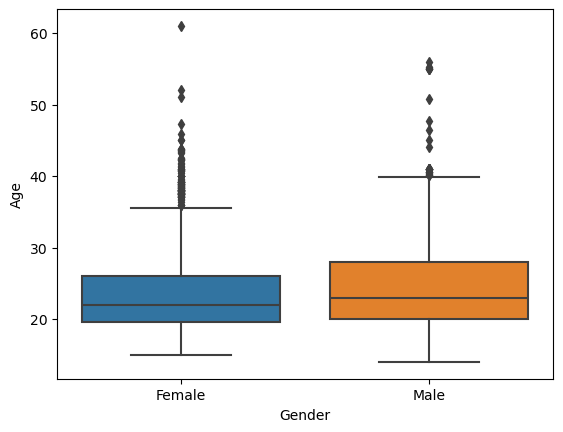

In [116]:
sns.boxplot(x='Gender',y='Age',data=df)

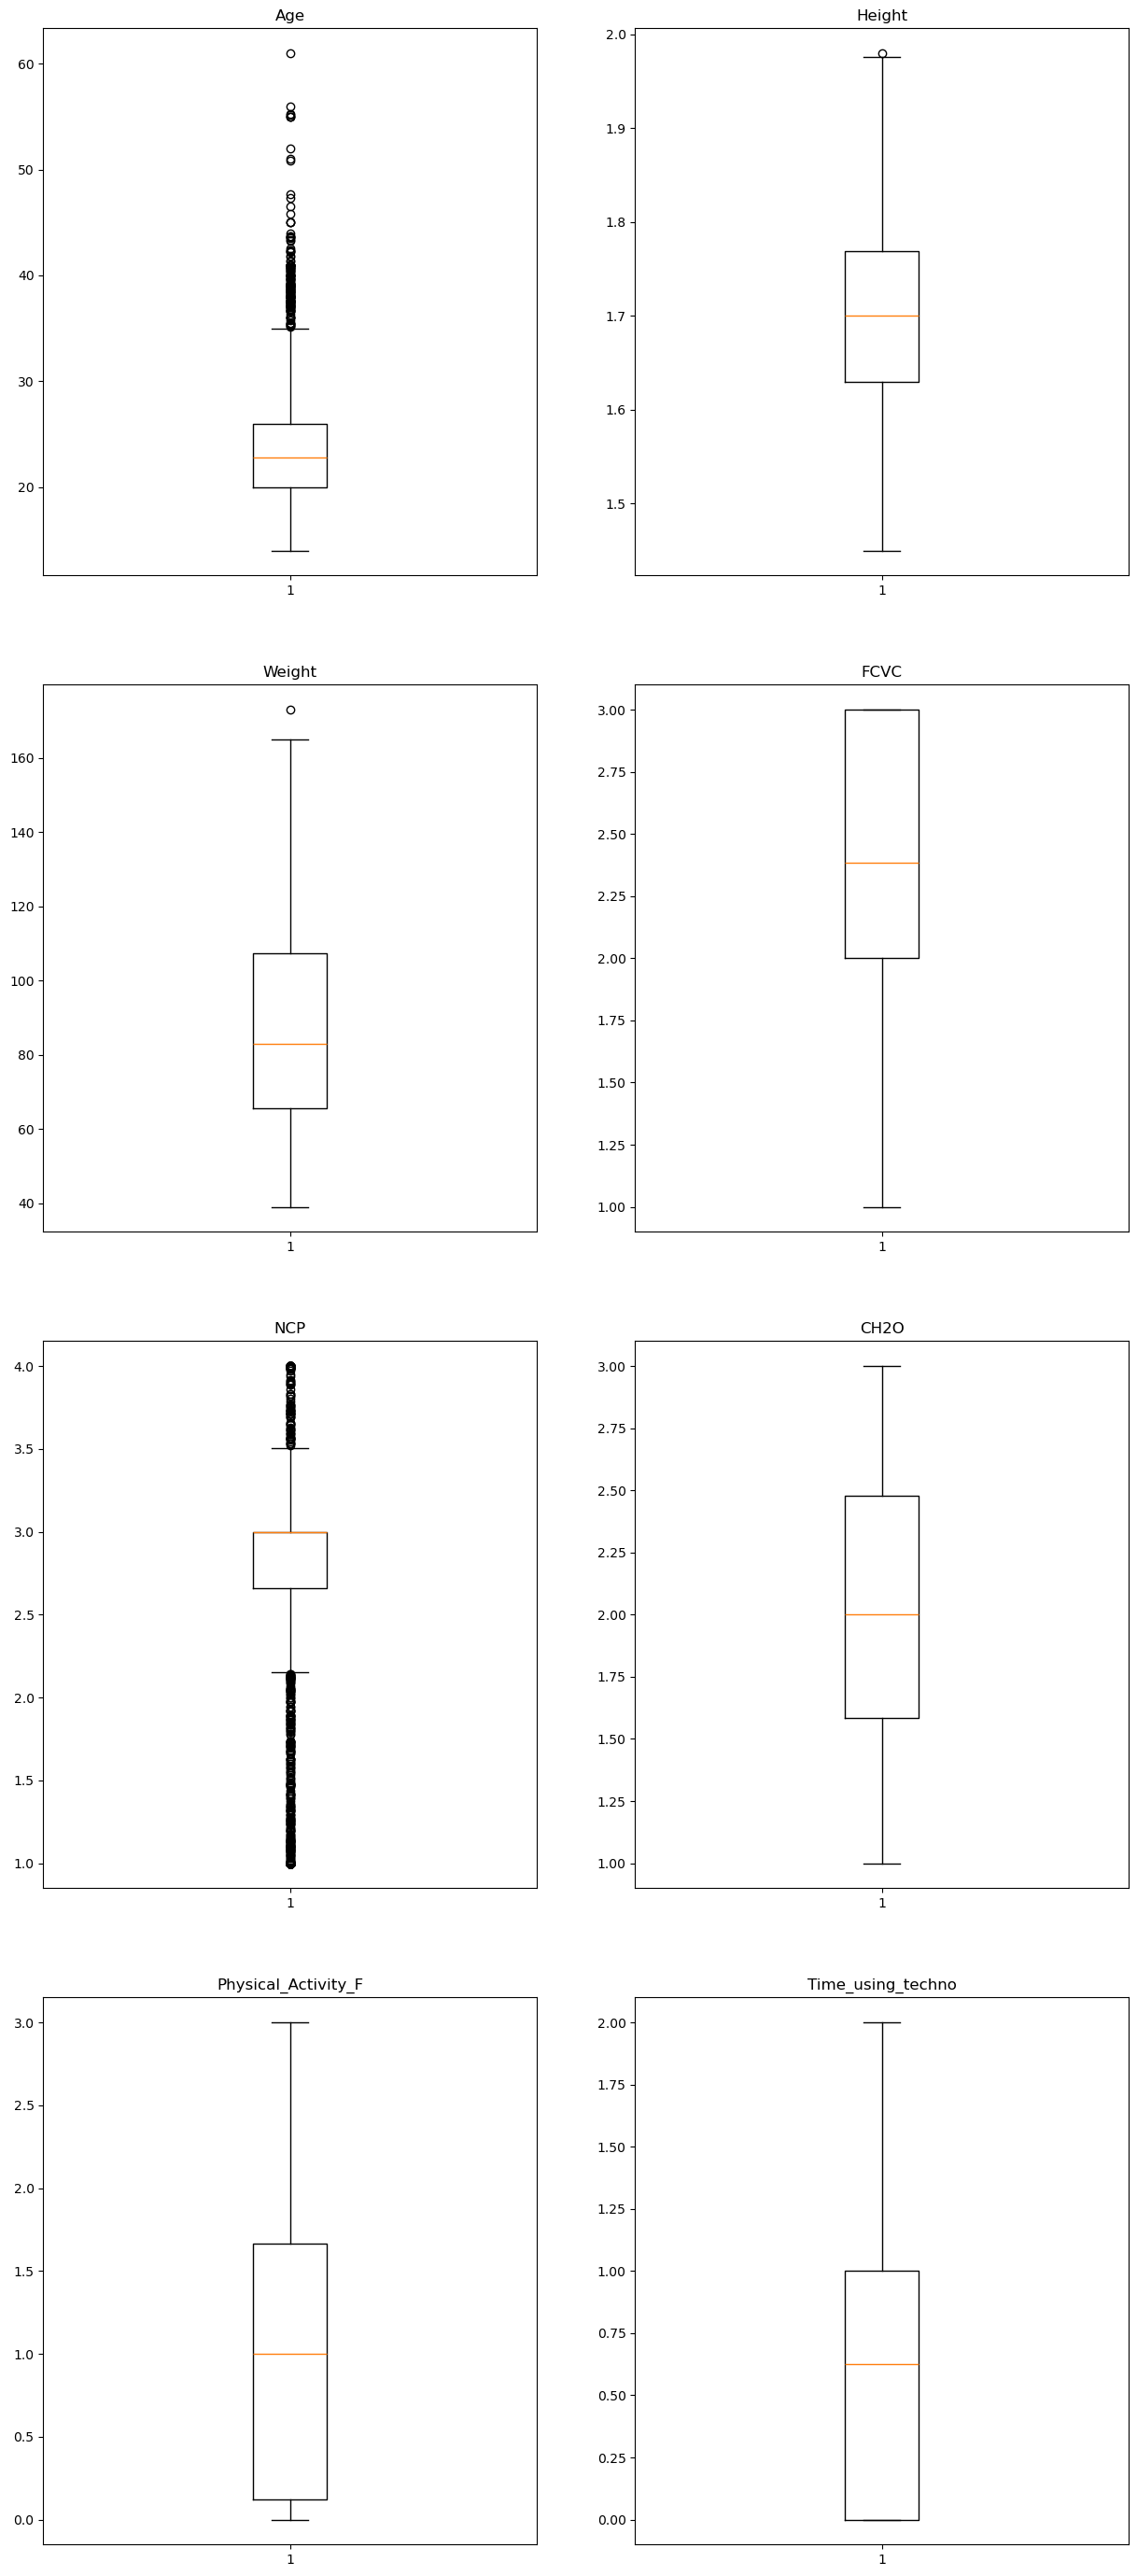

In [117]:
plt.figure(figsize=(15,35))
plt.subplot(4,2,1)
plt.boxplot(df.Age)
plt.title('Age')
plt.subplot(4,2,2)
plt.boxplot(df.Height)
plt.title('Height')
plt.subplot(4,2,3)
plt.boxplot(df.Weight)
plt.title('Weight')
plt.subplot(4,2,4)
plt.boxplot(df.FCVC)
plt.title('FCVC')
plt.subplot(4,2,5)
plt.boxplot(df.NCP)
plt.title('NCP')
plt.subplot(4,2,6)
plt.boxplot(df.CH2O)
plt.title('CH2O')
plt.subplot(4,2,7)
plt.boxplot(df.FAF)
plt.title('Physical_Activity_F')
plt.subplot(4,2,8)
plt.boxplot(df.TUE)
plt.title('Time_using_techno')
plt.show()

### Above boxplot represent graphical visualization of outliers in dataset. 
Presence of outliers can greatly affect the performance of ML algorithms therefore it is very important to handle outliers.
- We have outliers present in number of meals(NMM), Height, weight and Age column.
- will handle outliers in preprocessing stage.

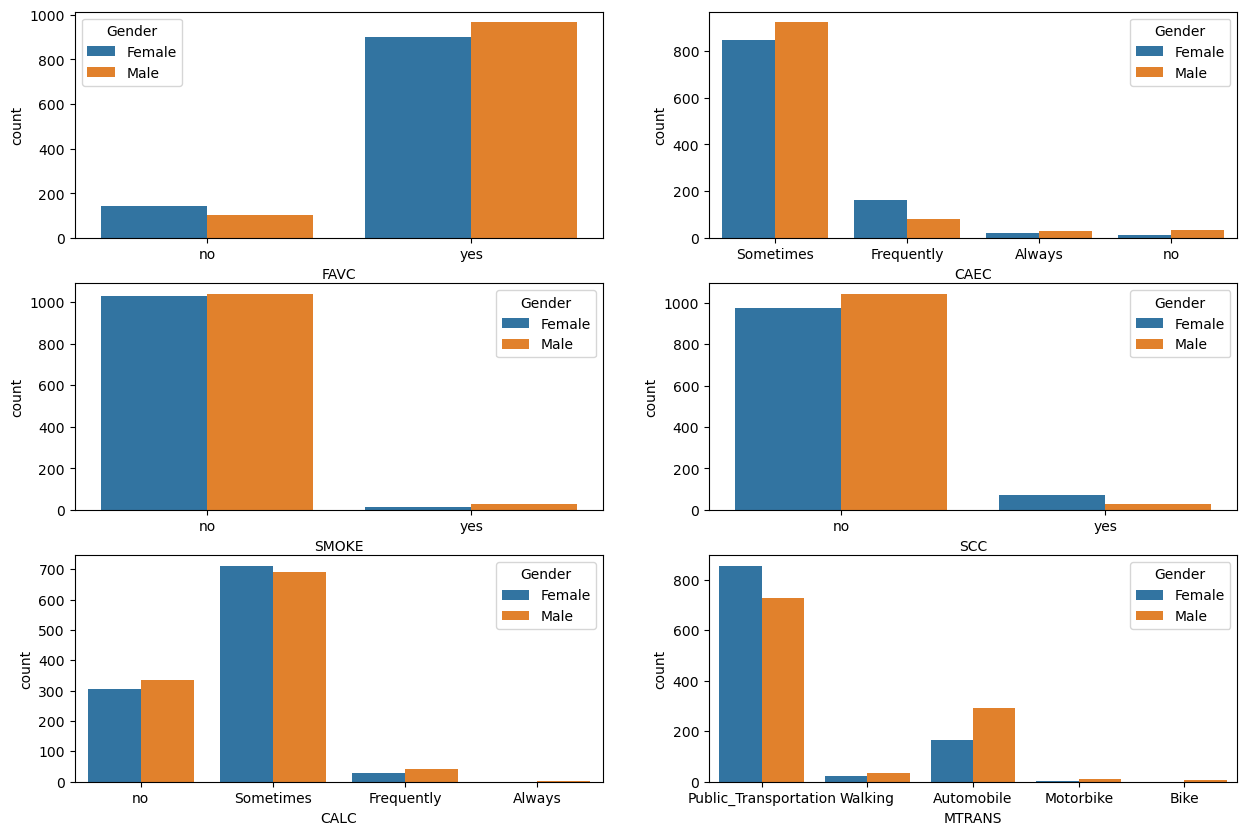

In [118]:
# Countplot for catagorical atributes
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.countplot(data= df, x ='FAVC',hue='Gender')
plt.subplot(3,2,2)
sns.countplot(data= df, x ='CAEC',hue='Gender')
plt.subplot(3,2,3)
sns.countplot(data= df, x ='SMOKE',hue='Gender')
plt.subplot(3,2,4)
sns.countplot(data= df, x ='SCC',hue='Gender')
plt.subplot(3,2,5)
sns.countplot(data= df, x ='CALC',hue='Gender')
plt.subplot(3,2,6)
sns.countplot(data= df, x ='MTRANS',hue='Gender')
plt.show()

### Above countplot represents catagorical values with refference to Age.
- Frequency of consumtion of high calorie food is more in both males and females.
- Both males and females preffer public transportation.
- very small quantity of population monitors calorie intake.
- out of all population more than 1600 people like to eat between their main meals.

### Scatterplot of how obesity varies with Physical activity and Age

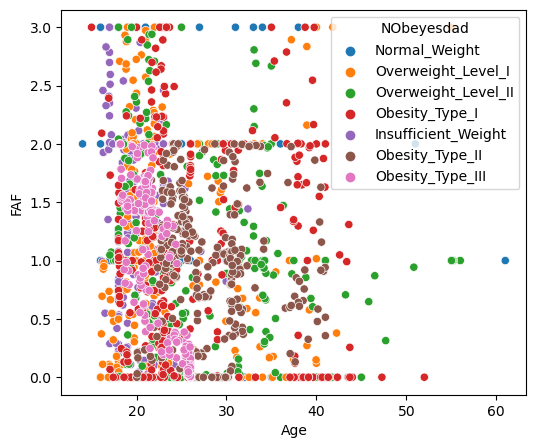

In [119]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age', y='FAF',data=df, hue = 'NObeyesdad')
plt.show()

- People who are not doing any physical activity are suffering from both overweight and obesity.
- Obesity type III is most frequent in young population between age 15-30.
- We can see that obesity type II is only present in people having age avove 20.

In [120]:
df.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

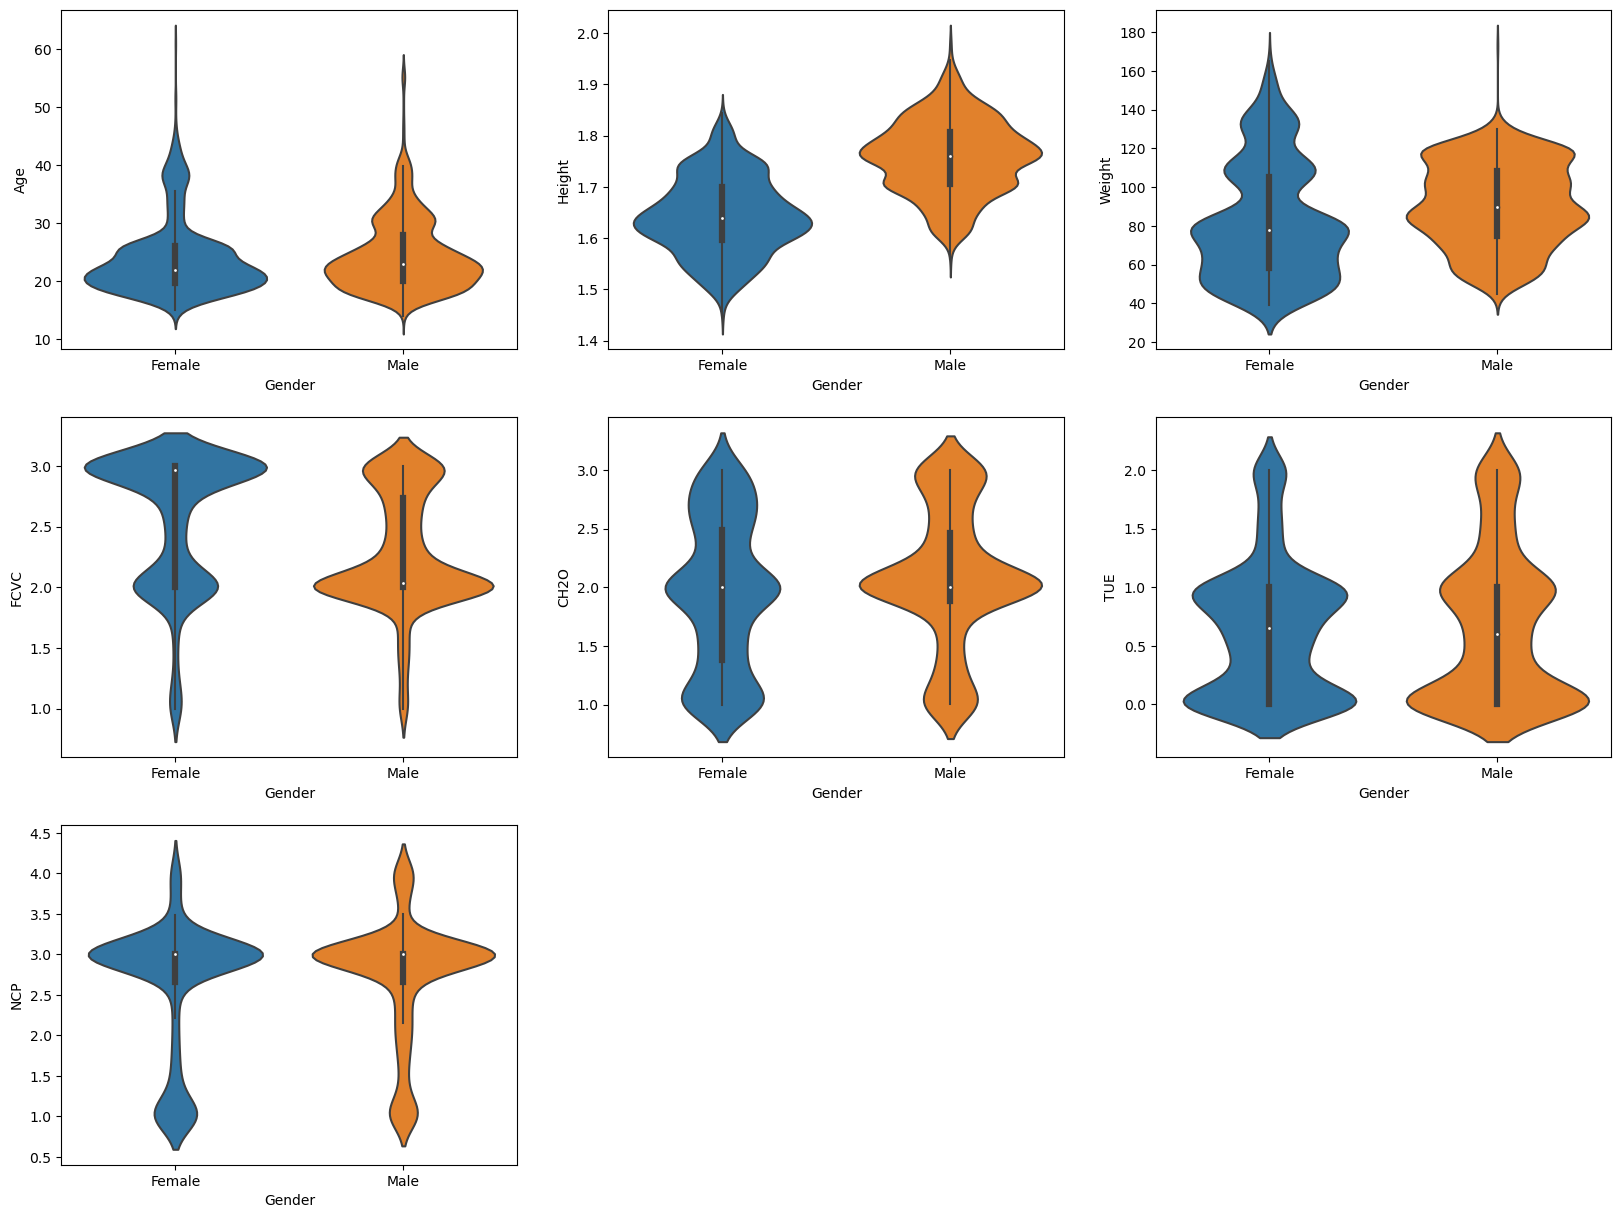

In [121]:

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.violinplot(x='Gender', y='Age', data=df)
plt.subplot(3,3,2)
sns.violinplot(x='Gender', y='Height', data=df)
plt.subplot(3,3,3)
sns.violinplot(x='Gender', y='Weight', data=df)
plt.subplot(3,3,4)
sns.violinplot(x='Gender', y='FCVC', data=df)
plt.subplot(3,3,5)
sns.violinplot(x='Gender', y='CH2O', data=df)
plt.subplot(3,3,6)
sns.violinplot(x='Gender', y='TUE', data=df)
plt.subplot(3,3,7)
sns.violinplot(x='Gender', y='NCP', data=df)
plt.show()

We can see here in avove violin plot that there is high skewness in age and number of main meals variable.
We will remove this skewness using IQR in preprocessing.

# Preprocessing

## Handling missing values 

Handling missing values is very important in machine learning.

if not you may end up building a biased model, leading to incorrect result.

Missing data can lead to lack of precision.


In [122]:
# check if there are any missing or null values left
df[df.isnull().any(axis=1)].head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [123]:
df.shape # 24 duplicated values are removed

(2111, 17)

## Handling Outliers

Outliers significantly affect the process of estimating avearage and standard deviation resulting in overestimated or underestimated values.

therefore results of machine learning algorithm depends on handling of outliers.

In [124]:
for cols in df.columns:            
    if df[cols].dtype == object :       # Selecting only numerical column
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3-Q1
        
        low = Q1 - 1.5*(Q3-Q1)          
        high = Q3 + 1.5*(Q3-Q1)
        df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()   # Replacing outliers with median

 ** In the above code we have replaced outliers with median values of that column. **

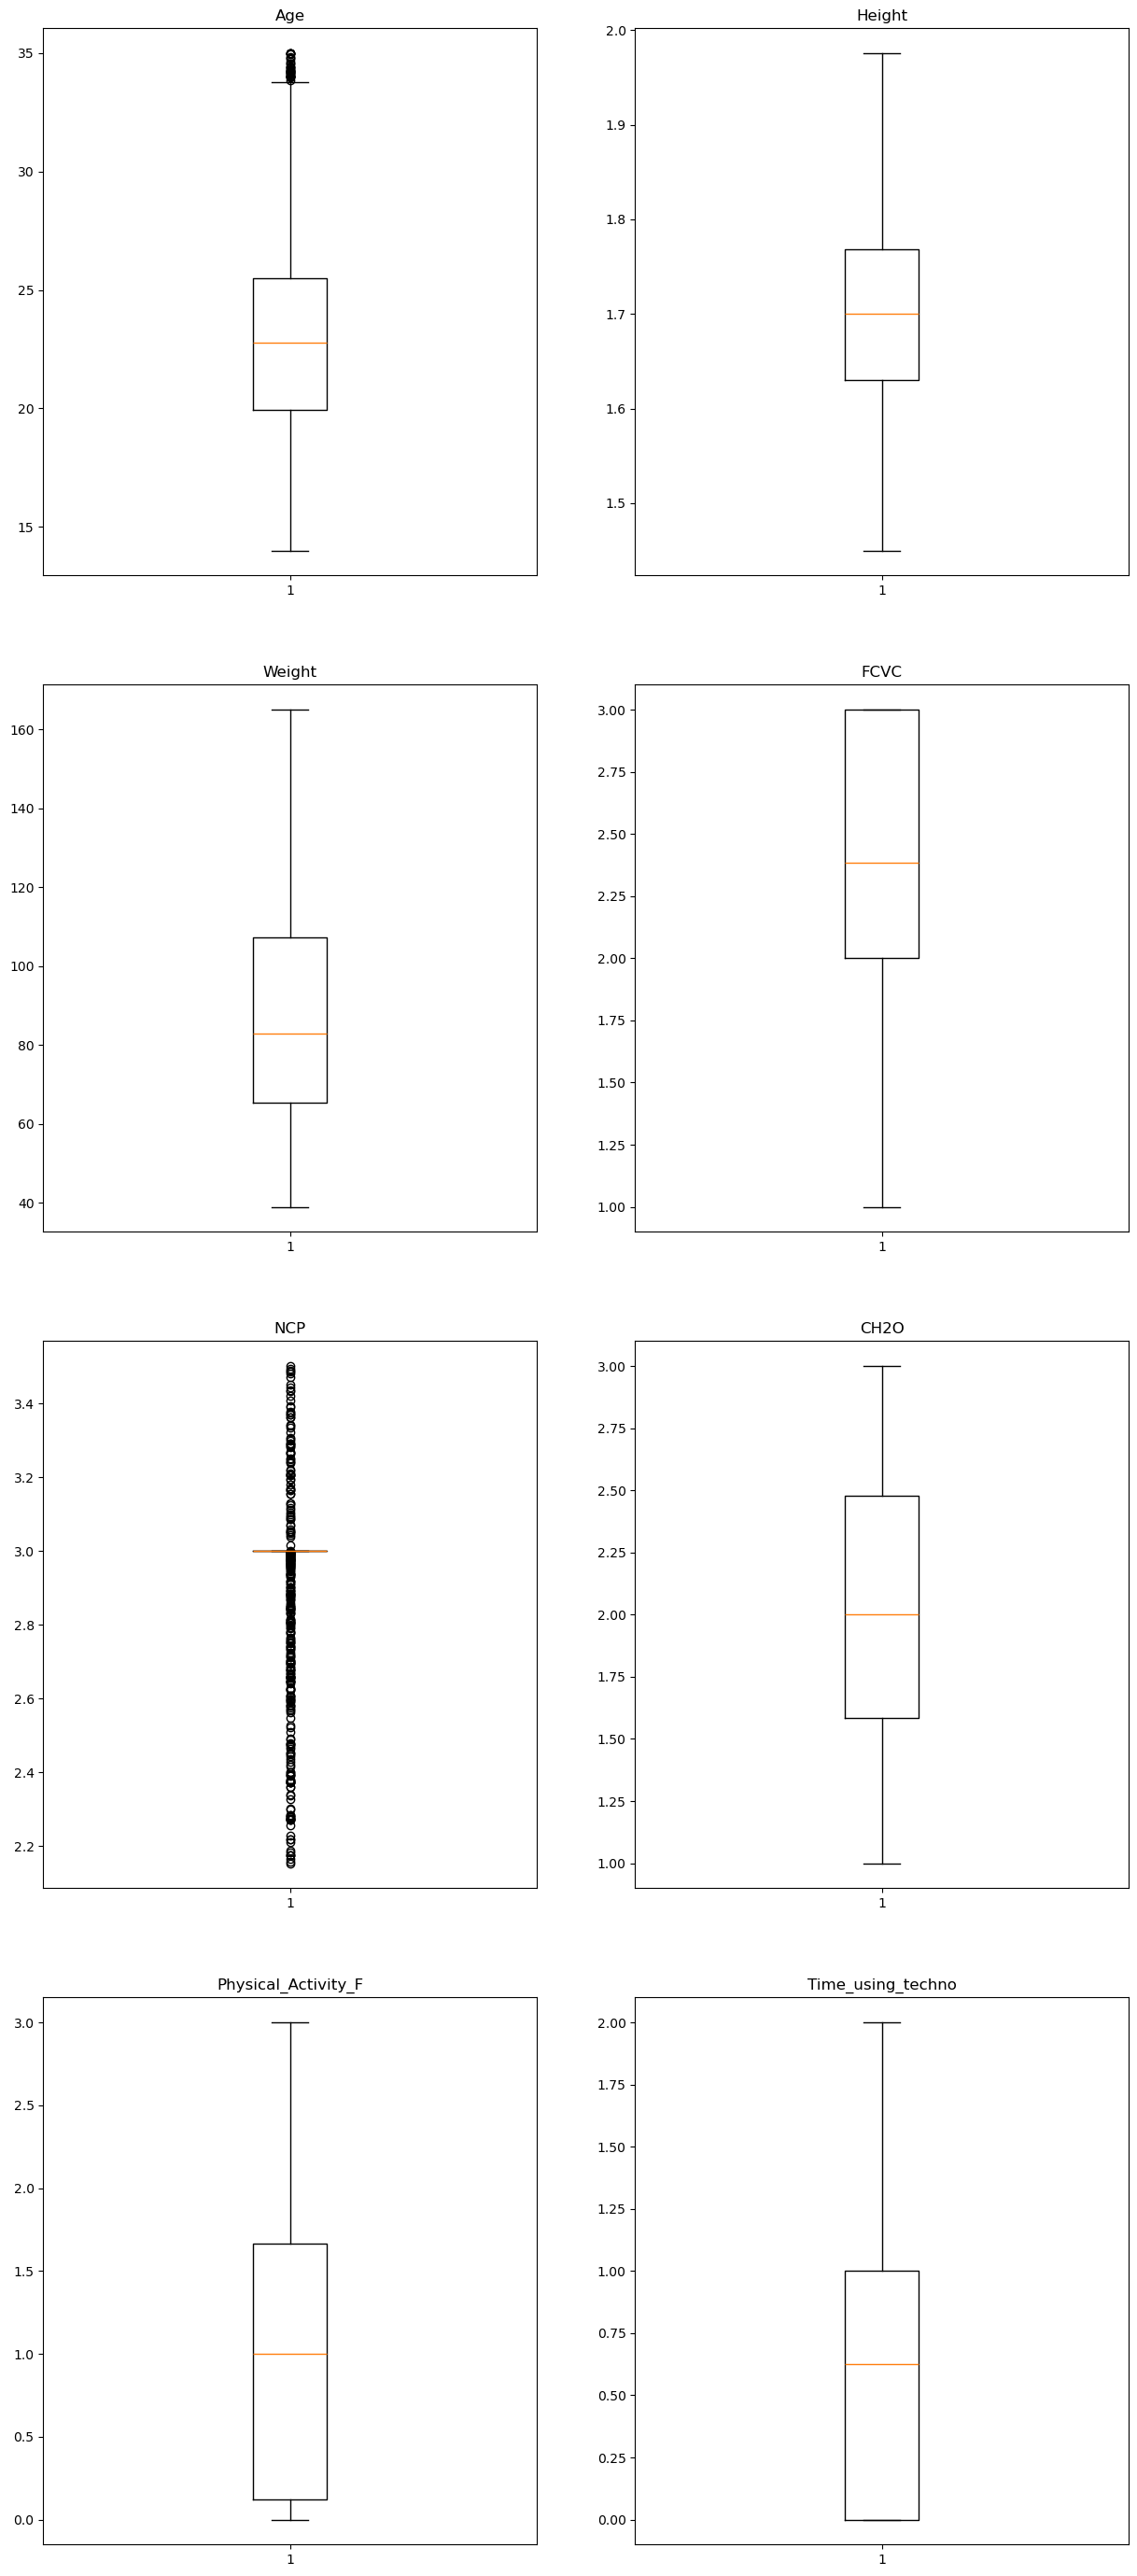

In [125]:
##TO COMPARE FROM PREVIOUS BOXPLOT WE CAN RUN AND SEE THE CHANGES 
plt.figure(figsize=(15,35))
plt.subplot(4,2,1)
plt.boxplot(df.Age)
plt.title('Age')
plt.subplot(4,2,2)
plt.boxplot(df.Height)
plt.title('Height')
plt.subplot(4,2,3)
plt.boxplot(df.Weight)
plt.title('Weight')
plt.subplot(4,2,4)
plt.boxplot(df.FCVC)
plt.title('FCVC')
plt.subplot(4,2,5)
plt.boxplot(df.NCP)
plt.title('NCP')
plt.subplot(4,2,6)
plt.boxplot(df.CH2O)
plt.title('CH2O')
plt.subplot(4,2,7)
plt.boxplot(df.FAF)
plt.title('Physical_Activity_F')
plt.subplot(4,2,8)
plt.boxplot(df.TUE)
plt.title('Time_using_techno')
plt.show()

# Feature Scaling

We have different features varying in scale and degrees of range.

Therefore in order for machine learning algorithm to interpret these features on same scale we need to perform feature scaling.

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=['int','float']).columns] = scaler.fit_transform(df[df.select_dtypes(include=['int','float']).columns])  # Selecting only numerical features
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,-0.467665,-0.876020,-0.863157,yes,no,-0.785019,0.184954,Sometimes,no,-0.013073,no,-1.188039,0.561997,no,Public_Transportation,Normal_Weight
1,Female,-0.467665,-1.950298,-1.169466,yes,no,1.088342,0.184954,Sometimes,yes,1.618759,yes,2.339750,-1.080625,Sometimes,Public_Transportation,Normal_Weight
2,Male,0.016636,1.057681,-0.365405,yes,no,-0.785019,0.184954,Sometimes,no,-0.013073,no,1.163820,0.561997,Frequently,Public_Transportation,Normal_Weight
3,Male,0.985237,1.057681,0.017482,no,no,1.088342,0.184954,Sometimes,no,-0.013073,no,1.163820,-1.080625,Frequently,Walking,Overweight_Level_I
4,Male,-0.225514,0.842826,0.124690,no,no,-0.785019,0.184954,Sometimes,no,-0.013073,no,-1.188039,-1.080625,Sometimes,Public_Transportation,Overweight_Level_II


In [127]:
# Now using scatterplot will understand what changes has been made 
scaled = pd.DataFrame(df[df.select_dtypes(include=['int','float']).columns])
scaled.columns = list(df.select_dtypes(include=['int','float']).columns)

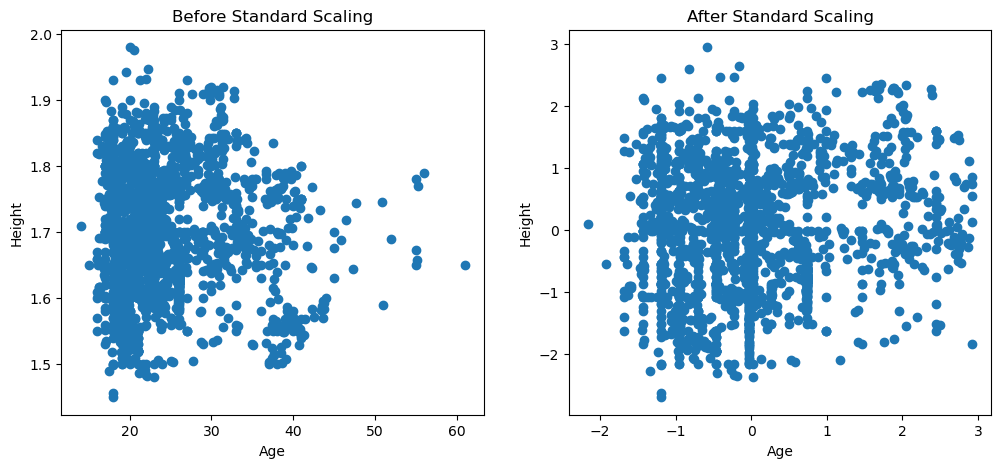

In [128]:
# scatterplot of before scaling and after scaling data.
# taking age and weight column as example.

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(dataset.Age, dataset.Height)
ax1.set_title('Before Standard Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Height')

ax2.scatter(scaled.Age, scaled.Height)
ax2.set_title('After Standard Scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('Height');

Standerdization scales the data in a way that your mean becomes 0 and standard deviation as 1.

## Catagorical features

Many machiche learning algorithm cannot understand catagorical values. 

therefore it is best practice for performance of machine learning algorithm to convert catagorical features to machine understandable values.

In [129]:
df.dtypes=='object'

Gender                             True
Age                               False
Height                            False
Weight                            False
family_history_with_overweight     True
FAVC                               True
FCVC                              False
NCP                               False
CAEC                               True
SMOKE                              True
CH2O                              False
SCC                                True
FAF                               False
TUE                               False
CALC                               True
MTRANS                             True
NObeyesdad                         True
dtype: bool

In [130]:
df['Gender'], c =pd.factorize(df['Gender'])
df['family_history_with_overweight'], c = pd.factorize(df['family_history_with_overweight'])
df['FAVC'], c = pd.factorize(df['FAVC'])
df['SMOKE'], c = pd.factorize(df['SMOKE'])
df['SCC'], c = pd.factorize(df['SCC'])

In [131]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [132]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])
df['CAEC'] = le.fit_transform(df['CAEC'])
df['CALC'] = le.fit_transform(df['CALC'])
df['MTRANS'] = le.fit_transform(df['MTRANS'])

In [133]:
df['NObeyesdad']

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int32

In [134]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,0,-0.473272,0.098673,1.717823,0,1,1.088342,0.184954,2,0,-0.456705,0,0.783135,0.407996,2,3,4
2107,0,-0.229645,0.505330,1.807205,0,1,1.088342,0.184954,2,0,-0.004702,0,0.389341,-0.096251,2,3,4
2108,0,-0.098619,0.544241,1.805153,0,1,1.088342,0.184954,2,0,0.075361,0,0.474971,-0.019018,2,3,4
2109,0,0.346429,0.407206,1.792031,0,1,1.088342,0.184954,2,0,1.377801,0,0.151471,-0.117991,2,3,4
2110,0,0.177595,0.400610,1.796855,0,1,1.088342,0.184954,2,0,1.396035,0,0.018996,0.092432,2,3,4


# Train Test Split 

In [135]:
X = df.iloc[:,:-1]
y = df['NObeyesdad']

### Assumption check

Clssification model like logistic regression does not need many assumptions like Linear regression only requires data in Normal distribution.

In [136]:
# Importing scipy for statistical functions
from scipy import stats

In [137]:
# Skewness of data
print('The skewness of data is :-\n',stats.skew(X))

The skewness of data is :-
 [-0.02368712  0.82830363 -0.02132229  0.24495222  1.64504589 -2.39742016
 -0.43259816 -2.80429714 -1.90617037  6.70809657 -0.10483708  4.36316697
  0.49813534  0.61806284  0.23631329 -1.27925886]


In [138]:
# Kurtosis of data
print('The kurtosis of data is :-\n',stats.kurtosis(X))

The kurtosis of data is :-
 [-1.99943892  0.26822763 -0.58176841 -0.73239327  0.70617598  3.74762342
 -0.63887776 13.10683073  5.38617488 42.99855962 -0.88015401 17.03722601
 -0.62195975 -0.55020264 -0.32801253 -0.19397986]


In [139]:
# Checking outliers using z-score
z_score = np.abs(stats.zscore(X))
df[(z_score > 3).all(axis=1)]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [140]:
z_score

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1.011914,0.467665,0.876020,0.863157,0.472291,2.759769,0.785019,0.184954,0.300346,0.145900,0.013073,0.218272,1.188039,0.561997,1.419172,0.503337
1,1.011914,0.467665,1.950298,1.169466,0.472291,2.759769,1.088342,0.184954,0.300346,6.853997,1.618759,4.581439,2.339750,1.080625,0.521160,0.503337
2,0.988227,0.016636,1.057681,0.365405,0.472291,2.759769,0.785019,0.184954,0.300346,0.145900,0.013073,0.218272,1.163820,0.561997,2.461491,0.503337
3,0.988227,0.985237,1.057681,0.017482,2.117337,2.759769,1.088342,0.184954,0.300346,0.145900,0.013073,0.218272,1.163820,1.080625,2.461491,1.296280
4,0.988227,0.225514,0.842826,0.124690,2.117337,2.759769,0.785019,0.184954,0.300346,0.145900,0.013073,0.218272,1.188039,1.080625,0.521160,0.503337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.011914,0.473272,0.098673,1.717823,0.472291,0.362349,1.088342,0.184954,0.300346,0.145900,0.456705,0.218272,0.783135,0.407996,0.521160,0.503337
2107,1.011914,0.229645,0.505330,1.807205,0.472291,0.362349,1.088342,0.184954,0.300346,0.145900,0.004702,0.218272,0.389341,0.096251,0.521160,0.503337
2108,1.011914,0.098619,0.544241,1.805153,0.472291,0.362349,1.088342,0.184954,0.300346,0.145900,0.075361,0.218272,0.474971,0.019018,0.521160,0.503337
2109,1.011914,0.346429,0.407206,1.792031,0.472291,0.362349,1.088342,0.184954,0.300346,0.145900,1.377801,0.218272,0.151471,0.117991,0.521160,0.503337


In [141]:
# Creating dataframe of skewness and kurtosis
norm_data = pd.DataFrame()
norm_data['Atributes'] = X.columns
norm_data['Skewness'] = stats.skew(X)
norm_data['Kurtosis'] = stats.kurtosis(X)

In [142]:
norm_data

,Atributes,Skewness,Kurtosis
0,Gender,-0.023687,-1.999439
1,Age,0.828304,0.268228
2,Height,-0.021322,-0.581768
3,Weight,0.244952,-0.732393
4,family_history_with_overweight,1.645046,0.706176
5,FAVC,-2.397420,3.747623
6,FCVC,-0.432598,-0.638878
7,NCP,-2.804297,13.106831
8,CAEC,-1.906170,5.386175
9,SMOKE,6.708097,42.998560


- for data to be normal the skewness and kurtosis must be in range of -1 and +1.
- from above dataframe we can see that except categorical features all the continuous atributes are normally distributed except NMM.
- from z_score we can say that we dont have any outliers present.

### Feature Selection

In [143]:
# Performing feature selection using Decision Tree
from sklearn.tree import DecisionTreeClassifier
FS_dt = DecisionTreeClassifier(max_depth=10).fit(X, y)

In [144]:
# Creating a dataframe of feature_importances_
feature_select = pd.DataFrame()
feature_select['Features'] = X.columns
feature_select['feature_importances_'] = FS_dt.feature_importances_
feature_select.sort_values(by='feature_importances_', ascending=False)

,Features,feature_importances_
3,Weight,0.471030
2,Height,0.224859
0,Gender,0.159385
1,Age,0.040699
14,CALC,0.024510
5,FAVC,0.020377
6,FCVC,0.017043
8,CAEC,0.012260
10,CH2O,0.007142
13,TUE,0.006256


In [145]:
# Selecting only imp features
l = ['Weight','Height','Gender','Age','CALC','FAVC','FCVC','CAEC','FAF','MTRANS','CH2O','TUE','SMOKE']
scaled_x = X[l]

In [146]:
# # Dropping columns
# scaled = scaled_x.drop(columns=['NCP'],axis=1)

In [147]:
# Randomly sampling dataset into train and test set 

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(scaled_x, y, test_size=0.2, random_state=40)

In [148]:
print('Shape of train_X is',train_X.shape)
print('Shape of train_y is',train_y.shape)
print('Shape of test_X is',test_X.shape)
print('Shape of test_y is',test_y.shape)

Shape of train_X is (1688, 13)
Shape of train_y is (1688,)
Shape of test_X is (423, 13)
Shape of test_y is (423,)


# Model Implementation

Now we will try to differnent models on data and choose best one which is performing better for model deployment.

following are the classification models that we are going to implement

- Logistic Regression
- Decision Tree
- Support Vector Classifier
- Random Forest
- XGBoost

## Model 1 - Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [150]:
# Creating a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(train_X, train_y)  # Fitting the model

LogisticRegression()

In [151]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %logistic_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' % logistic_model.score(test_X, test_y)) 

Training score is:- 0.88
Testing score is:- 0.89


In [153]:
# Predicting the model 
pred_logistic = logistic_model.predict(test_X)

In [154]:
# Determining accuracy of model using confusion matrix
result_logistic = confusion_matrix(test_y, pred_logistic)
result_logistic

array([[59,  0,  0,  0,  0,  0,  0],
       [ 7, 45,  0,  0,  0,  4,  2],
       [ 0,  0, 67,  4,  1,  0,  1],
       [ 0,  0,  0, 64,  0,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0],
       [ 0,  2,  0,  0,  0, 41,  9],
       [ 0,  0,  9,  0,  0,  6, 43]], dtype=int64)

In [155]:
# Accuracy using accuracy_score
logistic_model_accuarcy = accuracy_score(test_y, pred_logistic)
print('logistic_model_accuarcy:- %0.2f' % logistic_model_accuarcy)

logistic_model_accuarcy:- 0.89


In [156]:
logistic_model_CR = classification_report(test_y, pred_logistic)
print(logistic_model_CR)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        59
           1       0.96      0.78      0.86        58
           2       0.88      0.92      0.90        73
           3       0.94      1.00      0.97        64
           4       0.98      1.00      0.99        59
           5       0.80      0.79      0.80        52
           6       0.78      0.74      0.76        58

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.89      0.89      0.89       423



## Model 2 - Decision Tree

In [157]:
# Creating DT model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=4)  

In [158]:
# Training the model
dt_model.fit(train_X, train_y)  

DecisionTreeClassifier(max_depth=4)

In [159]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' % dt_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' % dt_model.score(test_X, test_y)) 

Training score is:- 0.80
Testing score is:- 0.78


In [160]:
# Predicting the model 
pred_dt = dt_model.predict(test_X)

In [161]:
# Determining accuracy of model using confusion matrix
result_dt = confusion_matrix(test_y, pred_dt)
result_dt

array([[55,  4,  0,  0,  0,  0,  0],
       [ 2, 39,  0,  0,  0, 14,  3],
       [ 0,  0, 54,  2,  0,  2, 15],
       [ 0,  0,  5, 58,  0,  0,  1],
       [ 0,  0,  0,  0, 59,  0,  0],
       [ 0,  3,  0,  0,  0, 31, 18],
       [ 0,  1, 10,  0,  0, 14, 33]], dtype=int64)

In [162]:
# Accuracy using accuracy_score
dt_model_accuarcy = accuracy_score(test_y, pred_dt)
print('dt_model_accuarcy:- %0.2f' % dt_model_accuarcy)

dt_model_accuarcy:- 0.78


In [163]:
dt_model_CR = classification_report(test_y, pred_dt)
print(dt_model_CR)

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        59
           1       0.83      0.67      0.74        58
           2       0.78      0.74      0.76        73
           3       0.97      0.91      0.94        64
           4       1.00      1.00      1.00        59
           5       0.51      0.60      0.55        52
           6       0.47      0.57      0.52        58

    accuracy                           0.78       423
   macro avg       0.79      0.77      0.78       423
weighted avg       0.80      0.78      0.78       423



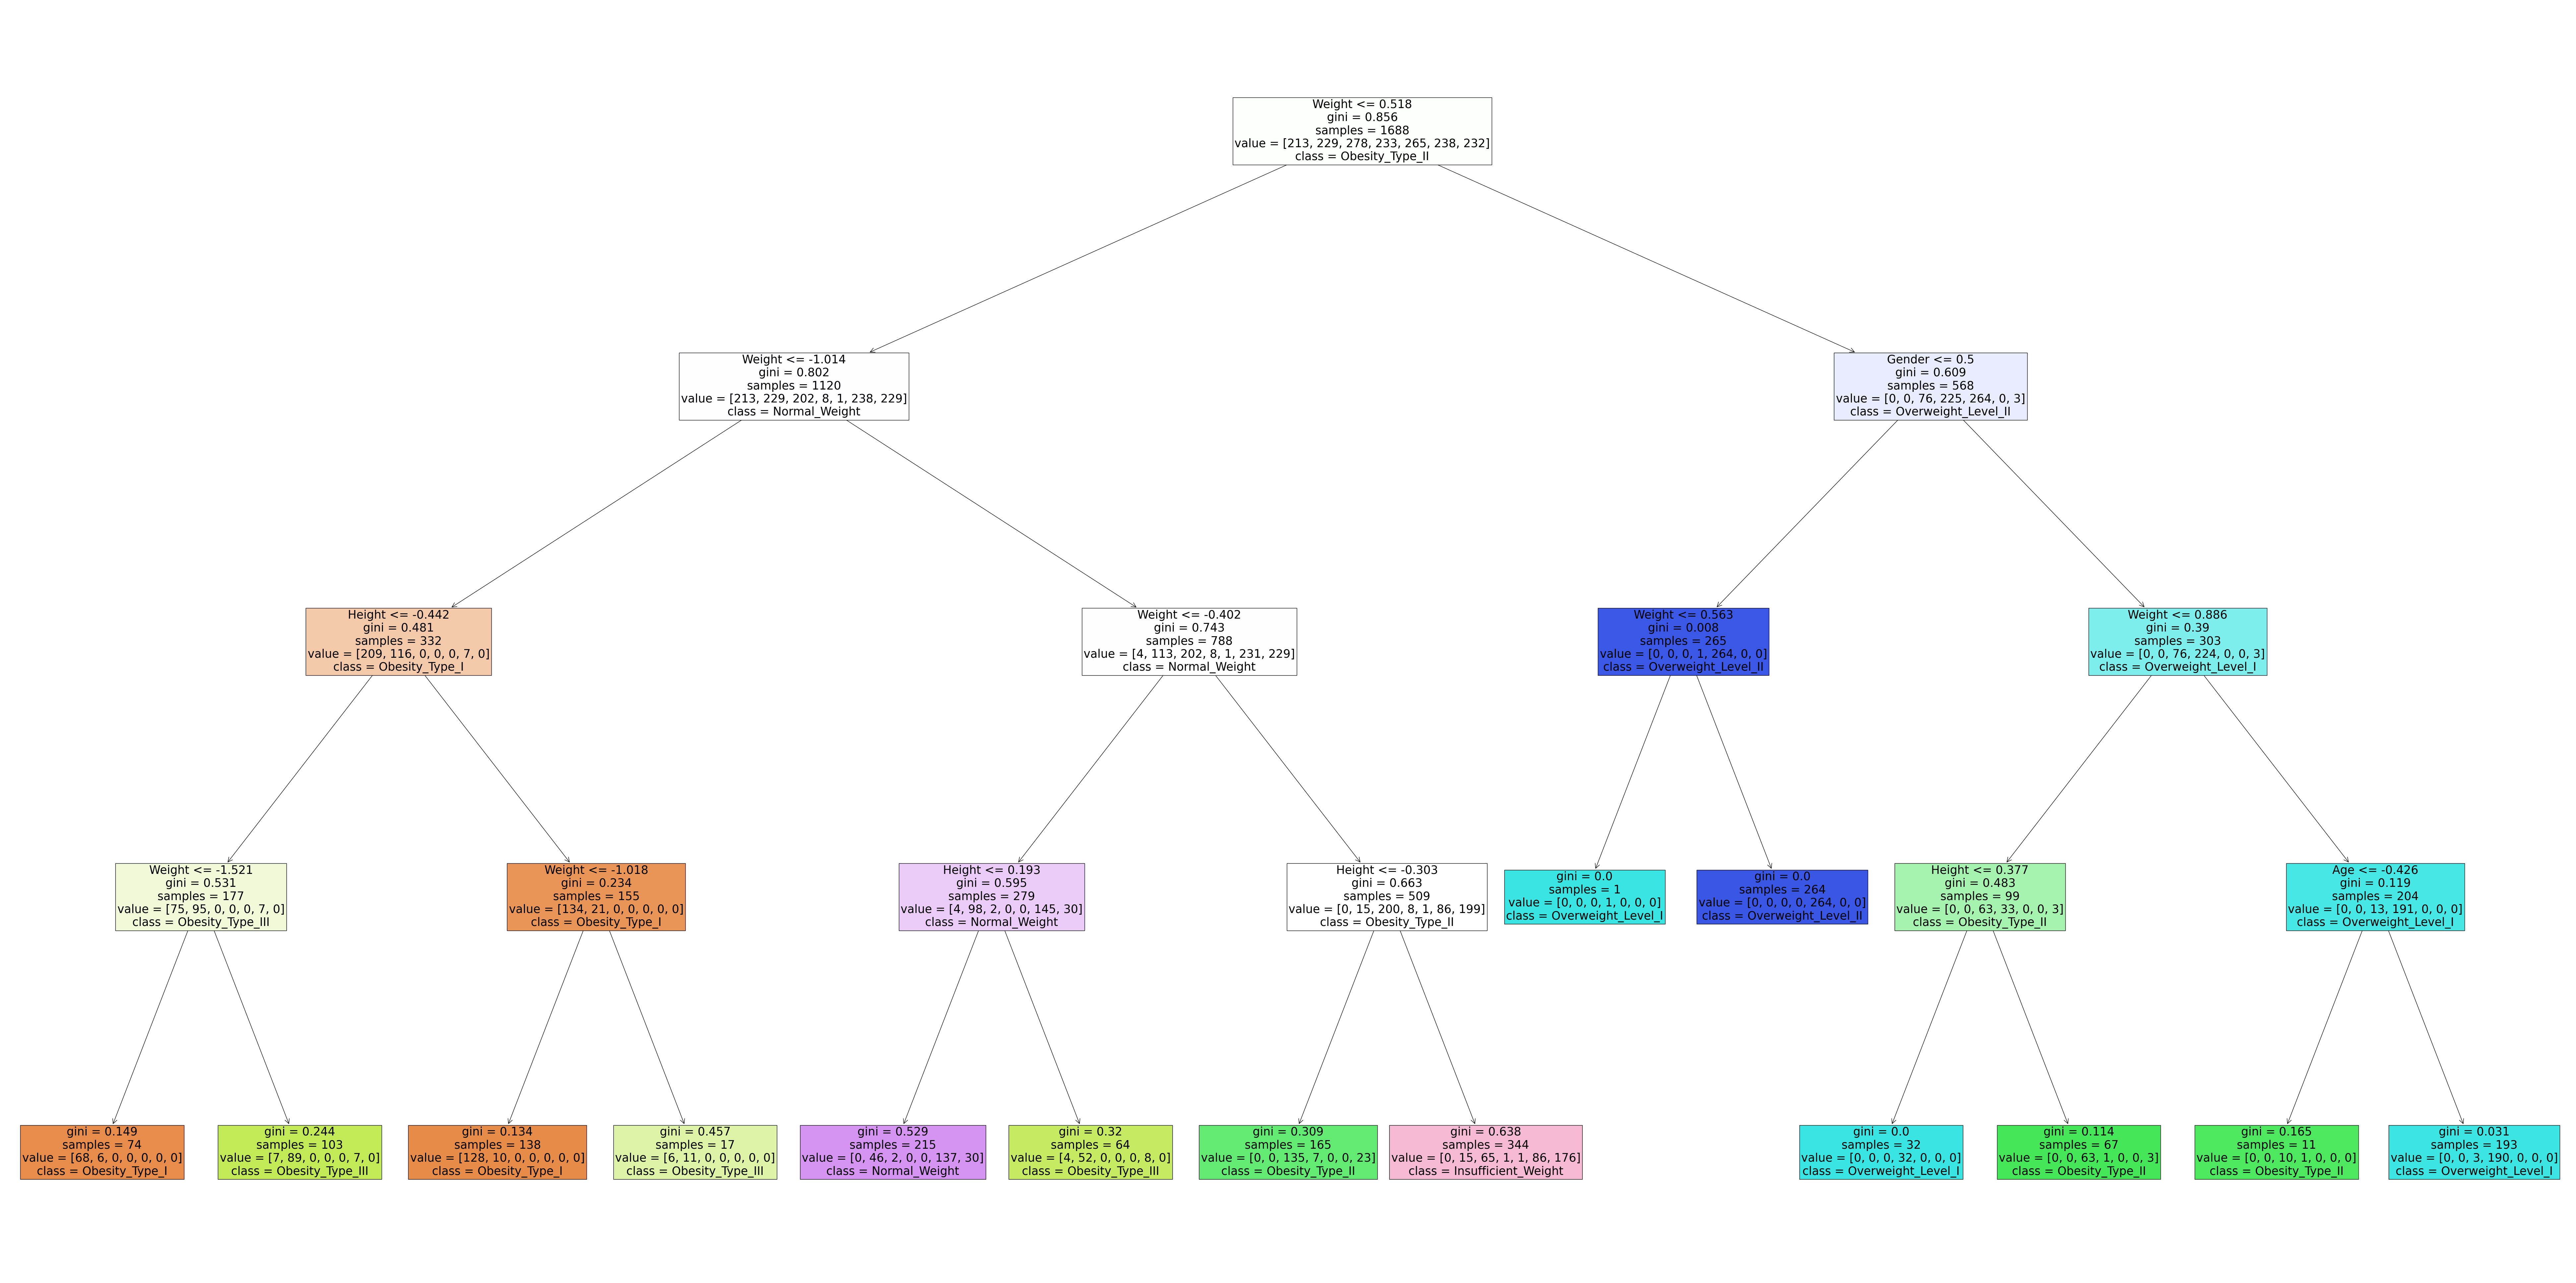

In [165]:
from sklearn import tree
fig = plt.figure(figsize=(100,50))
names = scaled_x.columns
class1 = ['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight']

_ = tree.plot_tree(dt_model, 
                   feature_names=names,  
                   class_names=class1,
                   impurity=True,
                   filled=True,
                   fontsize=25)
fig.savefig("DecisionTree.png")  # Saving the tree as an image file

- Decision tree model is created with fixed depth to prevent overfitting.
- Accuracy of training and test set are 0.80 and 0.78. 
- The final prediction accuracy is 0.78.
- Model is not performing well in predicting class 5 and 1.
- The important features are Weight, Gender, Height, Age, Consumption_Alc etc.

## Model 3 - Supprt Vector Classification

In [175]:
from sklearn.svm import SVC

In [176]:
# Creating the model
svc_model = SVC()
svc_model.fit(train_X, train_y)

SVC()

In [177]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' % svc_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' % svc_model.score(test_X, test_y)) 

Training score is:- 0.93
Testing score is:- 0.91


In [178]:
# Predicting the model 
pred_svc = svc_model.predict(test_X)

In [179]:
# Determining accuracy of model using confusion matrix
result_svc = confusion_matrix(test_y, pred_svc)
result_svc

array([[57,  2,  0,  0,  0,  0,  0],
       [10, 42,  0,  0,  0,  4,  2],
       [ 0,  0, 71,  1,  0,  0,  1],
       [ 0,  0,  0, 64,  0,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0],
       [ 0,  2,  0,  0,  0, 48,  2],
       [ 0,  0,  3,  0,  0,  9, 46]], dtype=int64)

In [180]:
# Accuracy using accuracy_score
svc_model_accuarcy = accuracy_score(test_y, pred_svc)
print('dt_model_accuarcy:-%0.2f' % svc_model_accuarcy)

dt_model_accuarcy:-0.91


In [181]:
svc_model_CR = classification_report(test_y, pred_svc)
print(svc_model_CR)

              precision    recall  f1-score   support

           0       0.85      0.97      0.90        59
           1       0.91      0.72      0.81        58
           2       0.96      0.97      0.97        73
           3       0.98      1.00      0.99        64
           4       1.00      1.00      1.00        59
           5       0.79      0.92      0.85        52
           6       0.90      0.79      0.84        58

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.92      0.91      0.91       423



# Model 4 - KNN

In [182]:
from sklearn.neighbors import KNeighborsClassifier

In [183]:
knn_accuracy_list = []                                    # store accuracy in list
for k in range(40):
    k = k+1
    knn_model = KNeighborsClassifier(n_neighbors= k)      # creating the model
    knn_model.fit(train_X, train_y)                       # fitting the model 
    pred_knn = knn_model.predict(test_X)                  # make prediction on test dataset
    knn_acc_score = accuracy_score(test_y, pred_knn)      
    knn_accuracy_list.append(knn_acc_score)

In [184]:
print('The maximum accuracy using KNN model is : %0.2f' %max(knn_accuracy_list))

The maximum accuracy using KNN model is : 0.87


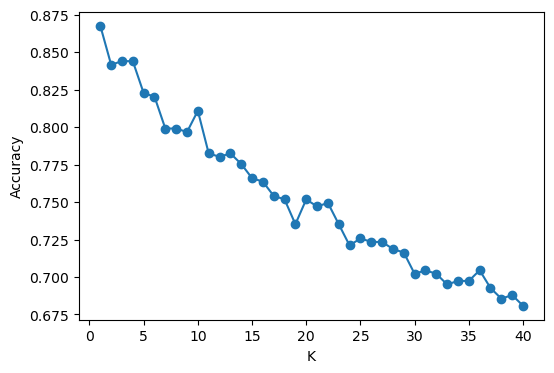

In [185]:
# Plotting accuracy vs k neigbhor
plt.figure(1,figsize=(6,4))
plt.plot(list(range(1,41)), knn_accuracy_list, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

- In above plot we can see untill k = 14 there is sudden drop in accuracy but after k = 14 accuracy is stabalizing.
- So we will take k = 14

In [200]:
knn_model = KNeighborsClassifier(n_neighbors= 10)      
knn_model.fit(train_X, train_y)                      
pred_knn = knn_model.predict(test_X)

In [201]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' % knn_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' % knn_model.score(test_X, test_y)) 

Training score is:- 0.83
Testing score is:- 0.81


In [202]:
# Accuracy using accuracy_score
knn_model_accuarcy = accuracy_score(test_y, pred_knn)
print('dt_model_accuarcy:-%0.2f' % knn_model_accuarcy)

dt_model_accuarcy:-0.81


In [203]:
# Determining accuracy of model using confusion matrix
result_knn = confusion_matrix(test_y, pred_knn)
result_knn

array([[58,  1,  0,  0,  0,  0,  0],
       [18, 18,  7,  0,  0,  8,  7],
       [ 0,  0, 66,  4,  0,  0,  3],
       [ 0,  0,  3, 61,  0,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0],
       [ 1,  1,  6,  1,  0, 42,  1],
       [ 1,  3,  4,  6,  0,  5, 39]], dtype=int64)

In [204]:
knn_model_CR = classification_report(test_y, pred_knn)
print(knn_model_CR)

              precision    recall  f1-score   support

           0       0.74      0.98      0.85        59
           1       0.78      0.31      0.44        58
           2       0.77      0.90      0.83        73
           3       0.85      0.95      0.90        64
           4       1.00      1.00      1.00        59
           5       0.76      0.81      0.79        52
           6       0.78      0.67      0.72        58

    accuracy                           0.81       423
   macro avg       0.81      0.80      0.79       423
weighted avg       0.81      0.81      0.79       423



- The KNN model is created using 10 neighbors.
- The training and Testing set accuracy is 0.83 and 0.81 which clearly shows overfitting.
- here we have tried total 40 neighbors, out of this the best accuracy was 0.84 but model was overfitted.

## Model 5 - Random Forest 

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
# Creating the model
rf_model = RandomForestClassifier()
# Training the model
rf_model.fit(train_X, train_y)

RandomForestClassifier()

In [208]:
# Predicting the model 
pred_rf = rf_model.predict(test_X)

In [209]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %rf_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' %rf_model.score(test_X, test_y)) 

Training score is:- 1.00
Testing score is:- 0.96


In [210]:
# Determining accuracy of model using confusion matrix
result_rf = confusion_matrix(test_y, pred_rf)
result_rf

array([[59,  0,  0,  0,  0,  0,  0],
       [ 2, 54,  0,  0,  0,  1,  1],
       [ 0,  0, 71,  0,  0,  0,  2],
       [ 0,  0,  0, 64,  0,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0],
       [ 0,  3,  0,  0,  0, 49,  0],
       [ 0,  4,  2,  1,  0,  0, 51]], dtype=int64)

In [211]:
print('The accuracy of the model is :-%0.2f' %accuracy_score(test_y, pred_rf))

The accuracy of the model is :-0.96


In [212]:
# Classification report
rf_model_CR = classification_report(test_y, pred_rf)
print(rf_model_CR)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        59
           1       0.89      0.93      0.91        58
           2       0.97      0.97      0.97        73
           3       0.98      1.00      0.99        64
           4       1.00      1.00      1.00        59
           5       0.98      0.94      0.96        52
           6       0.94      0.88      0.91        58

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



- Random Forest Classifier model is created using sklearn.ensemble.
- The training and testing set acuracy is 1 and 0.96, which clearly shows overfitting.
- The final accuracy on prediction is 0.96.

## Model 6- XGBoost

In [213]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

In [214]:
# Creating the model
xgb_model = XGBClassifier()
# Training the model
xgb_model.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [215]:
# Predicting the model 
pred_xgb = xgb_model.predict(test_X)

In [216]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %xgb_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' %xgb_model.score(test_X, test_y)) 

Training score is:- 1.00
Testing score is:- 0.98


In [217]:
# Determining accuracy of model using confusion matrix
result_xgb = confusion_matrix(test_y, pred_xgb)
result_xgb

array([[59,  0,  0,  0,  0,  0,  0],
       [ 1, 56,  0,  0,  0,  1,  0],
       [ 0,  0, 73,  0,  0,  0,  0],
       [ 0,  0,  0, 64,  0,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0],
       [ 0,  2,  0,  0,  0, 50,  0],
       [ 0,  1,  2,  0,  0,  1, 54]], dtype=int64)

In [218]:
print('The accuracy of the model is :-%0.2f' %accuracy_score(test_y, pred_xgb))

The accuracy of the model is :-0.98


In [219]:
# Classification report
xgb_model_CR = classification_report(test_y, pred_xgb)
print(xgb_model_CR)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       0.95      0.97      0.96        58
           2       0.97      1.00      0.99        73
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        59
           5       0.96      0.96      0.96        52
           6       1.00      0.93      0.96        58

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423



- In above XG Boosting classifier model train accuracy is more than test accuracy, model is overfitting.
- The accuracy on unseen data is 0.98.
- Here F1 score is above 0.96 for all classes, this model is performing well in classifying the data.

In [220]:
# Creating dataframe of performance metrics
result_metrics = pd.DataFrame({'Model':['model_1 (Logistic Regression)','model_2 (Decision Tree)','model_3 (Support Vector Machines)','model_4 (K Nearest Neighbors)','model_5 (Random Forest)', 'model_6 (eXtreme Gradient Boosting)'], 
                               'train accuracy':[0.88, 0.80, 0.93, 0.83, 1, 1],
                               'test accuracy':[0.89, 0.78, 0.91, 0.81, 0.96, 0.98],
                               'Accuracy':[0.89, 0.78, 0.78, 0.91, 0.96, 0.98], 
                               #'Accuracy_after_hypertuning':[]
                              })
result_metrics

,Model,train accuracy,test accuracy,Accuracy
0,model_1 (Logistic Regression),0.88,0.89,0.89
1,model_2 (Decision Tree),0.80,0.78,0.78
2,model_3 (Support Vector Machines),0.93,0.91,0.78
3,model_4 (K Nearest Neighbors),0.83,0.81,0.91
4,model_5 (Random Forest),1.00,0.96,0.96
5,model_6 (eXtreme Gradient Boosting),1.00,0.98,0.98


- Looking at above result metrics we can see XGBoosting (model 6) is the winner, but model is not genralized.
- KNN and DT both are performing poorly on classifying the data.
- In next step we will use hypertuning to increase the performance of some models.

# Hypertuning 

- Hyperparameter tunning is an important process in building machine learning models. The main importance of hyperparameter tunning lies in increasing and generalizing performance of model.
- Now we will hypertune models using GridSearch_CV.
- GridSearchCV is a Python machine learning library function that finds the best combination of hyperparameters for a model.

#### Hypertuning-Logistic Regression

In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [222]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 40)

tuned_paramaters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                     'penalty':['none', 'elasticnet', 'l1', 'l2'],
                     'C':[0.001, 0.01, 0.1, 1, 10, 100],
                     'max_iter':[100,500,1000]
                    }]

logreg = LogisticRegression()                                  
grid_search_logreg = GridSearchCV(logreg,
                          param_grid=tuned_paramaters, 
                          cv=folds, 
                          scoring='f1',
                          verbose=1)

grid_search_logreg.fit(train_X, train_y)    

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=40, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'max_iter': [100, 500, 1000],
                          'penalty': ['none', 'elasticnet', 'l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             scoring='f1', verbose=1)

In [223]:
print(grid_search_logreg.best_params_)
print(grid_search_logreg.best_estimator_)

{'C': 0.001, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}
LogisticRegression(C=0.001, penalty='none', solver='newton-cg')


In [224]:
# Creating model on hypertuned parameters
logreg_hyper_model= LogisticRegression(C=0.001, penalty='none', solver='newton-cg')
logreg_hyper_model = logreg_hyper_model.fit(train_X,train_y)
pred_logreg_hyper_model = logreg_hyper_model.predict(test_X)

In [225]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %logreg_hyper_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' %logreg_hyper_model.score(test_X, test_y)) 

Training score is:- 0.97
Testing score is:- 0.98


In [226]:
print('The final accuracy of the model is :-%0.2f' %accuracy_score(test_y, pred_logreg_hyper_model))

The final accuracy of the model is :-0.98


In [227]:
# Determining accuracy of model using confusion matrix
result_logreg_hyper_model = confusion_matrix(test_y, pred_logreg_hyper_model)
result_logreg_hyper_model

array([[58,  1,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  0,  0],
       [ 0,  0, 72,  0,  1,  0,  0],
       [ 0,  0,  0, 63,  1,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  3],
       [ 0,  0,  1,  0,  1,  1, 55]], dtype=int64)

In [228]:
# Classification report
logreg_hyper_model_CR = classification_report(test_y, pred_logreg_hyper_model)
print(logreg_hyper_model_CR)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        58
           2       0.99      0.99      0.99        73
           3       1.00      0.98      0.99        64
           4       0.95      1.00      0.98        59
           5       0.98      0.94      0.96        52
           6       0.95      0.95      0.95        58

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423



#### Hypertuning- Random Forest

In [229]:
folds = KFold(n_splits = 3, shuffle = True, random_state = 40) # specifying cross- validator

tuned_paramaters = [{'criterion':['gini','entropy'],             # Giving hyper parameters to tune
                     'max_depth':list(range(4,8)), 
                     'min_samples_split':list(range(2,5)),
                     'min_samples_leaf':list(range(1,5)),
                     'max_features':['sqrt','log2',None]}]

rf = RandomForestClassifier()                                  
grid_search_rf = GridSearchCV(rf,
                          param_grid=tuned_paramaters, 
                          cv=folds,
                          scoring='accuracy',
                          verbose=1)

grid_search_rf.fit(train_X, train_y)      

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=40, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 5, 6, 7],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_leaf': [1, 2, 3, 4],
                          'min_samples_split': [2, 3, 4]}],
             scoring='accuracy', verbose=1)

In [230]:
print(grid_search_rf.best_params_)
print(grid_search_rf.best_estimator_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
RandomForestClassifier(criterion='entropy', max_depth=7, max_features=None,
                       min_samples_split=3)


In [231]:
# Creating model on hypertuned parameters
rf_hyper_model= RandomForestClassifier(criterion='entropy', 
                                       max_depth=7, 
                                       max_features=None,
                                       min_samples_split=3,)

rf_hyper_model = rf_hyper_model.fit(train_X,train_y)
pred_rf_hyper_model = rf_hyper_model.predict(test_X)

In [232]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %rf_hyper_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' %rf_hyper_model.score(test_X, test_y)) 

Training score is:- 0.99
Testing score is:- 0.97


In [233]:
print('The final accuracy of the model is :-%0.2f' %accuracy_score(test_y, pred_rf_hyper_model))

The final accuracy of the model is :-0.97


In [234]:
# Determining accuracy of model using confusion matrix
result_rf_hyper_model = confusion_matrix(test_y, pred_rf_hyper_model)
result_rf_hyper_model

array([[59,  0,  0,  0,  0,  0,  0],
       [ 1, 55,  0,  0,  0,  2,  0],
       [ 0,  0, 72,  0,  0,  1,  0],
       [ 0,  0,  0, 64,  0,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0],
       [ 0,  2,  0,  0,  0, 49,  1],
       [ 0,  1,  2,  0,  0,  3, 52]], dtype=int64)

In [235]:
# Classification report
rf_hyper_model_CR = classification_report(test_y, pred_rf_hyper_model)
print(rf_hyper_model_CR)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       0.95      0.95      0.95        58
           2       0.97      0.99      0.98        73
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        59
           5       0.89      0.94      0.92        52
           6       0.98      0.90      0.94        58

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



#### Hypertuning- XGBoost classifier

In [236]:
folds = KFold(n_splits = 3, shuffle = True, random_state = 40) # specifying cross- validator

tuned_paramaters = {'n_estimators': [10, 50],     # number of tress
                    'max_depth':    [3, 5, 6],     
                    'learning_rate':[0.8, 0.6]}

xgb = XGBClassifier()                                  
grid_search_xgb = GridSearchCV(xgb,
                          param_grid=tuned_paramaters, 
                          cv=folds,
                          scoring='f1',
                          verbose=1)

grid_search_xgb.fit(train_X, train_y)      

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=40, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     int...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [3, 5, 6],
                         'n_estimators': [10, 50]},
             scoring='f1', verbose=1)

In [237]:
print(grid_search_xgb.best_params_)
print(grid_search_xgb.best_estimator_)

{'learning_rate': 0.8, 'max_depth': 3, 'n_estimators': 10}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [238]:
# Creating model on hypertuned parameters
xgb_hyper_model= XGBClassifier(learning_rate=0.8, max_depth=3, n_estimators= 10)
#, max_features=4,min_samples_leaf=3, min_samples_split=3)
xgb_hyper_model = xgb_hyper_model.fit(train_X,train_y)
pred_xgb_hyper_model = xgb_hyper_model.predict(test_X)

In [239]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %xgb_hyper_model.score(train_X, train_y)) 
print('Testing score is:- %0.2f' %xgb_hyper_model.score(test_X, test_y)) 

Training score is:- 0.99
Testing score is:- 0.96


In [240]:
print('The final accuracy of the model is :-%0.2f' %accuracy_score(test_y, pred_xgb_hyper_model))

The final accuracy of the model is :-0.96


In [241]:
# Determining accuracy of model using confusion matrix
result_xgb_hyper_model = confusion_matrix(test_y, pred_xgb_hyper_model)
result_xgb_hyper_model

array([[59,  0,  0,  0,  0,  0,  0],
       [ 1, 55,  0,  0,  0,  2,  0],
       [ 0,  0, 71,  2,  0,  0,  0],
       [ 0,  0,  0, 64,  0,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0],
       [ 0,  1,  0,  0,  0, 48,  3],
       [ 0,  1,  3,  0,  0,  3, 51]], dtype=int64)

In [242]:
# Classification report
xgb_hyper_model_CR = classification_report(test_y, pred_xgb_hyper_model)
print(xgb_hyper_model_CR)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       0.96      0.95      0.96        58
           2       0.96      0.97      0.97        73
           3       0.97      1.00      0.98        64
           4       1.00      1.00      1.00        59
           5       0.91      0.92      0.91        52
           6       0.94      0.88      0.91        58

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



- The training accuracy is still more than testing accuracy, and final accuracy on unseen data is reduced to 0.96

In [151]:
# Creating dataframe of performance metrics
result_metrics = pd.DataFrame({'Model':['model_1 (Logistic Regression)','model_2 (Decision Tree)','model_3 (Support Vector Machines)','model_4 (K Nearest Neighbors)','model_5 (Random Forest)', 'model_6 (eXtreme Gradient Boosting)'], 
                               'train accuracy':[0.87, 0.78, 0.92, 0.81, 1, 1],
                               'test accuracy':[0.89, 0.77, 0.91, 0.71, 0.97, 0.98],
                               'Accuracy':[0.89, 0.77, 0.91, 0.71, 0.97, 0.98], 
                               'Accuracy_after_hypertuning':[0.97, 'NA', 'NA', 'NA', 0.96, 0.95]
                              })

In [152]:
result_metrics

,Model,train accuracy,test accuracy,Accuracy,Accuracy_after_hypertuning
0,model_1 (Logistic Regression),0.87,0.89,0.89,0.97
1,model_2 (Decision Tree),0.78,0.77,0.77,NA
2,model_3 (Support Vector Machines),0.92,0.91,0.91,NA
3,model_4 (K Nearest Neighbors),0.81,0.71,0.71,NA
4,model_5 (Random Forest),1.00,0.97,0.97,0.96
5,model_6 (eXtreme Gradient Boosting),1.00,0.98,0.98,0.95


Before performing hypertuning only Logistic Regression, Decision Tree and Support Vector Machine has given generelized model.

Before hyper tuning model 1's accuracy was 0.89 same goes up to 0.97 after hyper tuning. 

As mentioned in above dataframe model_1 i.e. Logistic Regression is winner, It performed better in predicting target variables.

## Summary :

In this notebook I have performed different task like-

- Importing data 
- Exploratory data analysis
- Handling missing values
- Handling outliers 
- Handling catagorical features
- Feature scaling
- Assumption check
- Feature selection
- Sampling the data 
- Training different models 
- Hypertuning
- Result

 In this project Logistic regression model performed very well with accuracy of 97%. 

**Usefull cases**

- This type of model can be usefull for performing online surveys and to give personalized recomendations regarding fitness.

- Online Fitness Apps